In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=716e6c8359eddb1c6f4727dfd06a7a18'

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

len(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | barawe
City not found. Skipping...
Processing Record 3 of Set 1 | alofi
Processing Record 4 of Set 1 | sunrise manor
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | saleaula
City not found. Skipping...
Processing Record 8 of Set 1 | matsanga
City not found. Skipping...
Processing Record 9 of Set 1 | fairbanks
Processing Record 10 of Set 1 | bambous virieux
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | sept-iles
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | ushtobe
Processing Record 16 of Set 1 | gat
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Se

Processing Record 36 of Set 4 | chifeng
Processing Record 37 of Set 4 | saldanha
Processing Record 38 of Set 4 | humberto de campos
Processing Record 39 of Set 4 | sibolga
Processing Record 40 of Set 4 | ossora
Processing Record 41 of Set 4 | alta floresta
Processing Record 42 of Set 4 | jamestown
Processing Record 43 of Set 4 | provideniya
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | chapais
Processing Record 47 of Set 4 | naugarzan
City not found. Skipping...
Processing Record 48 of Set 4 | empalme
Processing Record 49 of Set 4 | margate
Processing Record 50 of Set 4 | ambatofinandrahana
Processing Record 1 of Set 5 | ehingen
Processing Record 2 of Set 5 | omsukchan
Processing Record 3 of Set 5 | north myrtle beach
Processing Record 4 of Set 5 | nushki
Processing Record 5 of Set 5 | severo-kurilsk
Processing Record 6 of Set 5 | goderich
Processing Record 7 of Set 5 | korla
Processing Record 8 of Set 5 | namie
Pro

Processing Record 21 of Set 8 | mogadishu
Processing Record 22 of Set 8 | broome
Processing Record 23 of Set 8 | azimur
City not found. Skipping...
Processing Record 24 of Set 8 | abonnema
Processing Record 25 of Set 8 | scottsburgh
City not found. Skipping...
Processing Record 26 of Set 8 | pacific grove
Processing Record 27 of Set 8 | meyungs
City not found. Skipping...
Processing Record 28 of Set 8 | kendari
Processing Record 29 of Set 8 | aksarka
Processing Record 30 of Set 8 | karaman
Processing Record 31 of Set 8 | sistranda
Processing Record 32 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 33 of Set 8 | kumluca
Processing Record 34 of Set 8 | candido mendes
Processing Record 35 of Set 8 | nome
Processing Record 36 of Set 8 | kota kinabalu
Processing Record 37 of Set 8 | aksu
Processing Record 38 of Set 8 | danilovka
Processing Record 39 of Set 8 | burnie
Processing Record 40 of Set 8 | pedasi
Processing Record 41 of Set 8 | bengkulu
Processing Record 42 of S

Processing Record 4 of Set 12 | kirakira
Processing Record 5 of Set 12 | inndyr
Processing Record 6 of Set 12 | chiredzi
Processing Record 7 of Set 12 | shashi
Processing Record 8 of Set 12 | jabiru
City not found. Skipping...
Processing Record 9 of Set 12 | kazlu ruda
Processing Record 10 of Set 12 | acapulco
Processing Record 11 of Set 12 | nata
Processing Record 12 of Set 12 | basoko
Processing Record 13 of Set 12 | ust-tsilma
Processing Record 14 of Set 12 | timmins
Processing Record 15 of Set 12 | edea
Processing Record 16 of Set 12 | bhum
Processing Record 17 of Set 12 | sarakhs
Processing Record 18 of Set 12 | santa ana
Processing Record 19 of Set 12 | wencheng
Processing Record 20 of Set 12 | joao camara
Processing Record 21 of Set 12 | taunggyi
Processing Record 22 of Set 12 | hai phong
City not found. Skipping...
Processing Record 23 of Set 12 | can tho
Processing Record 24 of Set 12 | bandipur
Processing Record 25 of Set 12 | srednekolymsk
Processing Record 26 of Set 12 | ey

540

In [11]:
len(city_data)

540

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,78.39,80,98,14.23,RE,2022-01-31 23:18:15
1,Alofi,-19.0595,-169.9187,78.69,83,75,9.22,NU,2022-01-31 23:15:29
2,Sunrise Manor,36.2111,-115.0731,62.24,16,0,4.61,US,2022-01-31 23:18:16
3,Nikolskoye,59.7035,30.7861,26.40,96,100,5.08,RU,2022-01-31 23:18:17
4,New Norfolk,-42.7826,147.0587,85.66,43,25,3.00,AU,2022-01-31 23:18:17
5,Fairbanks,64.8378,-147.7164,-2.07,72,0,0.00,US,2022-01-31 23:15:25
6,Bambous Virieux,-20.3428,57.7575,80.22,78,75,14.97,MU,2022-01-31 23:18:18
7,Butaritari,3.0707,172.7902,81.30,79,93,13.02,KI,2022-01-31 23:18:19
8,Sept-Iles,50.2001,-66.3821,7.05,59,20,4.00,CA,2022-01-31 23:18:20
9,Barrow,71.2906,-156.7887,-12.98,77,20,10.36,US,2022-01-31 23:16:31


In [13]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2022-01-31 23:18:15,-21.3585,55.7679,78.39,80,98,14.23
1,Alofi,NU,2022-01-31 23:15:29,-19.0595,-169.9187,78.69,83,75,9.22
2,Sunrise Manor,US,2022-01-31 23:18:16,36.2111,-115.0731,62.24,16,0,4.61
3,Nikolskoye,RU,2022-01-31 23:18:17,59.7035,30.7861,26.40,96,100,5.08
4,New Norfolk,AU,2022-01-31 23:18:17,-42.7826,147.0587,85.66,43,25,3.00
...,...,...,...,...,...,...,...,...,...
535,Port Augusta,AU,2022-01-31 23:33:05,-32.5000,137.7667,73.71,68,100,20.78
536,Alma,CA,2022-01-31 23:31:57,48.5501,-71.6491,-2.07,97,44,3.18
537,Klyuchi,RU,2022-01-31 23:34:42,52.2667,79.1667,6.15,97,71,7.00
538,Dingle,PH,2022-01-31 23:34:43,10.9995,122.6711,77.59,88,100,9.06


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

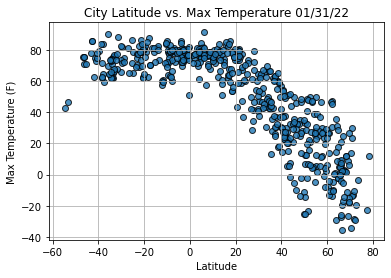

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

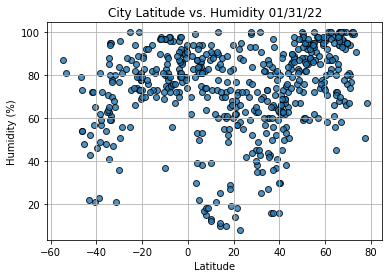

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

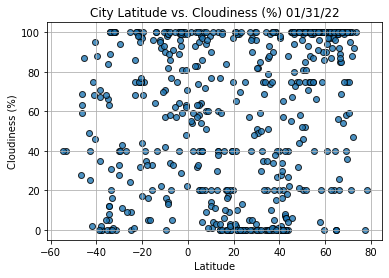

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [43]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
index13 = city_data_df.loc[13]

In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

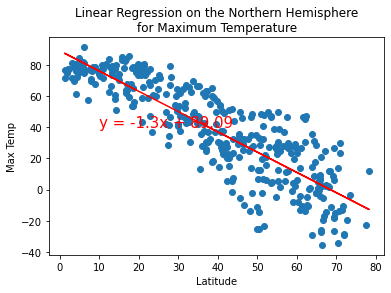

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

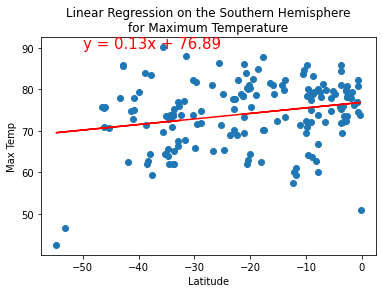

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,90))

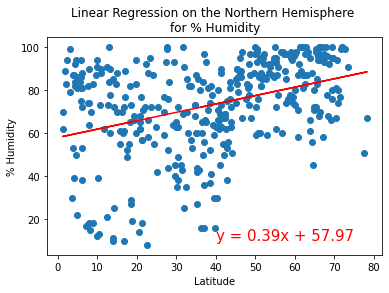

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

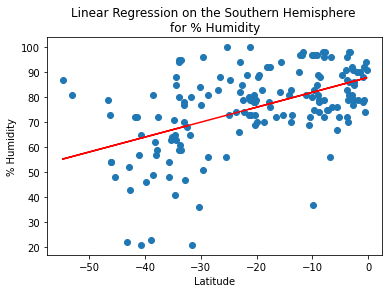

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

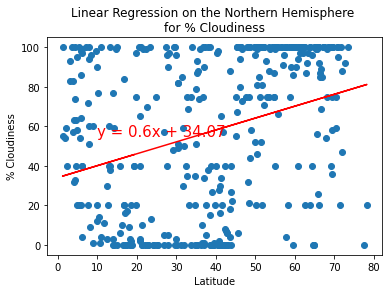

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,55))


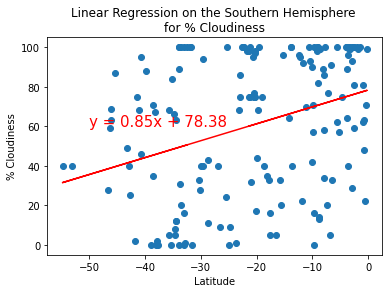

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

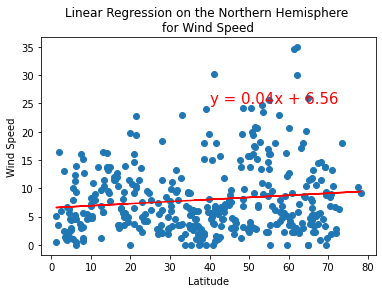

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,25))

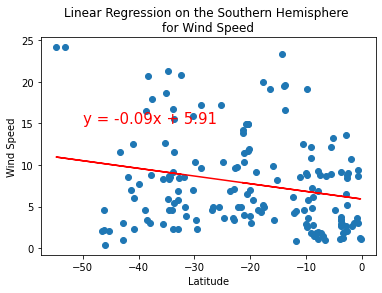

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,15))